<a href="https://colab.research.google.com/github/SuzukiDaishi/pd3-enquete/blob/main/PD3%E3%82%A2%E3%83%B3%E3%82%B1%E3%83%BC%E3%83%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install japanize-matplotlib

In [2]:
import pandas as pd
from google.colab import auth
from oauth2client.client import GoogleCredentials
import gspread
from gspread_dataframe import get_as_dataframe, set_with_dataframe
import matplotlib.pyplot as plt
import japanize_matplotlib
import json, requests 

## データ読み込み

In [3]:
url = requests.get('https://suzukidaishi.github.io/pd3-enquete/out/data_jp.json')
enq_list = pd.DataFrame(json.loads(url.text))
enq_list

,source,output,id
0,out/source/jp_test_normal/output_j002.wav,out/output/jp_test_normal/output_j002_j002.wav,1
1,out/source/jp_test_normal/output_j006.wav,out/output/jp_test_normal/output_j002_j006.wav,2
2,out/source/jp_test_normal/output_j009.wav,out/output/jp_test_normal/output_j002_j009.wav,3
3,out/source/jp_test_normal/output_j010.wav,out/output/jp_test_normal/output_j002_j010.wav,4
4,out/source/jp_test_normal/output_j002.wav,out/output/jp_test_normal/output_j006_j002.wav,5
...,...,...,...
187,out/source/jp_train_existing/output_j010.wav,out/output/jp_train_existing/output_j009_j010.wav,188
188,out/source/jp_train_existing/output_j002.wav,out/output/jp_train_existing/output_j010_j002.wav,189
189,out/source/jp_train_existing/output_j006.wav,out/output/jp_train_existing/output_j010_j006.wav,190
190,out/source/jp_train_existing/output_j009.wav,out/output/jp_train_existing/output_j010_j009.wav,191


In [4]:
auth.authenticate_user()
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [5]:
ss_id = '1_UgoNn5r50J8VTf8kDrYBOdPEx1jQj2fIb6xzk5-fOw'
workbook = gc.open_by_key(ss_id)
worksheet = workbook.get_worksheet(0)

In [6]:
data_list = worksheet.get_all_records()

In [7]:
ans_list = pd.DataFrame(data_list)
ans_list = ans_list[ans_list['調査対象ドメイン']!='suzuki']
ans_list

,調査対象ドメイン,調査ユーザーID,質問番号,質問１,質問２,質問3,回答時間
0,kit_web_tkg4,xmlz1vk1ay96xr9kcyqdb,1,4,4,,2021/10/27 21:35:00
1,kit_web_tkg4,xmlz1vk1ay96xr9kcyqdb,2,4,2,,2021/10/27 21:35:18
2,kit_web_tkg4,xmlz1vk1ay96xr9kcyqdb,3,5,3,,2021/10/27 21:35:37
3,kit_web_tkg4,xmlz1vk1ay96xr9kcyqdb,4,4,3,,2021/10/27 21:35:52
4,kit_web_tkg4,xmlz1vk1ay96xr9kcyqdb,5,4,1,,2021/10/27 21:36:07
...,...,...,...,...,...,...,...
2761,kit_web_tkg3,xl1ycik2ltmvihqmoj7rg,188,1,2,,2021/10/30 1:36:50
2762,kit_web_tkg3,xl1ycik2ltmvihqmoj7rg,189,1,3,,2021/10/30 1:37:18
2763,kit_web_tkg3,xl1ycik2ltmvihqmoj7rg,190,1,1,,2021/10/30 1:37:43
2764,kit_web_tkg3,xl1ycik2ltmvihqmoj7rg,191,1,2,,2021/10/30 1:38:42


## アンケート解答率

<BarContainer object of 16 artists>

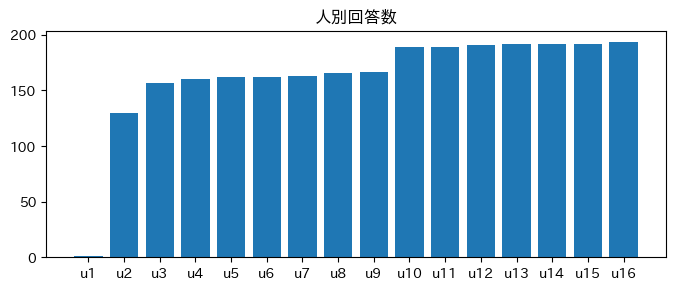

In [8]:
x = ans_list['調査ユーザーID'].unique()
y = sorted([ len(ans_list[ans_list['調査ユーザーID']==i]) for i in x ])
x = [ f'u{i+1}' for i in range(len(x)) ]
fig, ax = plt.subplots(figsize=(8, 3), dpi=100)
ax.set_title('人別回答数')
ax.bar(x, y)

<BarContainer object of 192 artists>

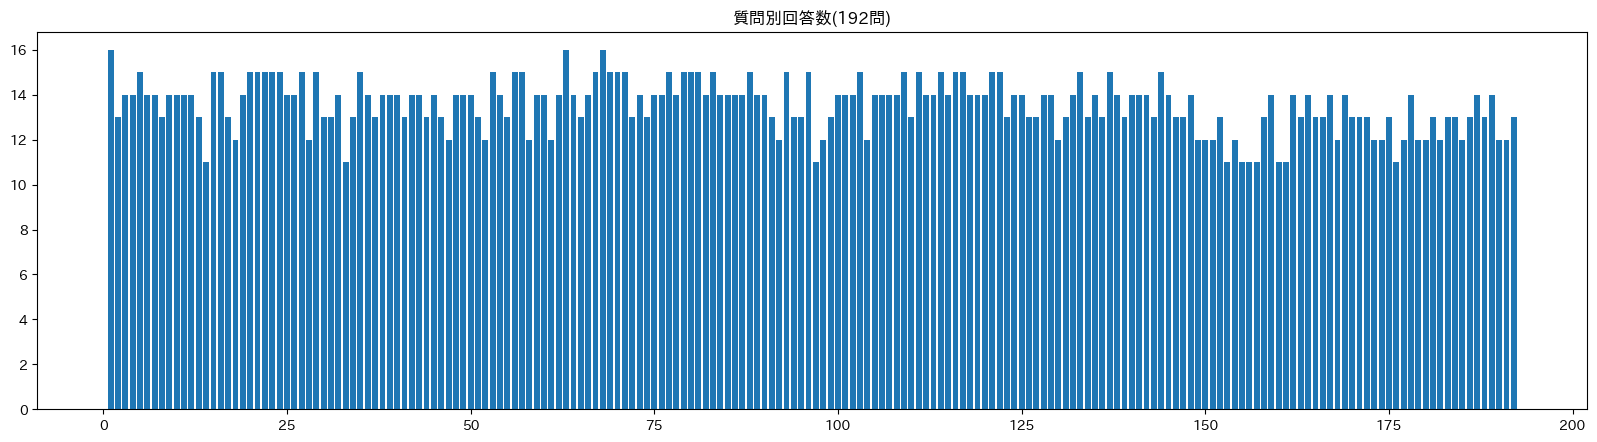

In [9]:
x = ans_list['質問番号'].unique()
y = [ len(ans_list[ans_list['質問番号']==i]) for i in x ]
fig, ax = plt.subplots(figsize=(20, 5), dpi=100)
ax.set_title(f'質問別回答数({max(x)}問)')
ax.bar(x, y)

In [10]:
print('質問回答数:', min(y), '~', max(y))

質問回答数: 11 ~ 16


<BarContainer object of 3 artists>

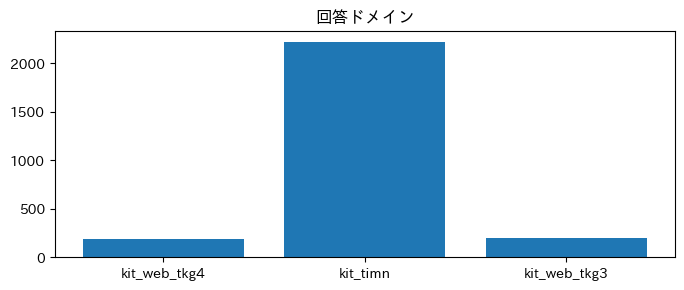

In [11]:
x = ans_list['調査対象ドメイン'].unique()
y = [ len(ans_list[ans_list['調査対象ドメイン']==i]) for i in x ]
fig, ax = plt.subplots(figsize=(8, 3), dpi=100)
ax.set_title(f'回答ドメイン')
ax.bar(x, y)

## アンケート: 全て



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


<BarContainer object of 4 artists>

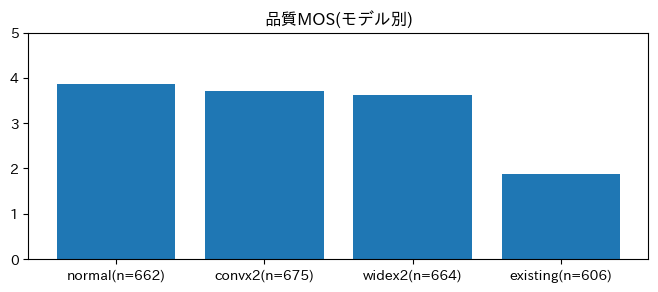

In [12]:
y = ['normal', 'convx2', 'widex2', 'existing']
x = []
for i, n in enumerate(y):
  ids = enq_list[enq_list['output'].str.contains(n)]['id']
  id_max = ids.max()
  id_min = ids.min()
  a = ans_list[id_min<=ans_list['質問番号']][ans_list['質問番号']<=id_max]
  x.append(a['質問１'].mean())
  y[i] += f'(n={len(a["質問１"])})'
fig, ax = plt.subplots(figsize=(8, 3), dpi=100)
plt.ylim(0, 5)
ax.set_title(f'品質MOS(モデル別)')
ax.bar(y, x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


<BarContainer object of 4 artists>

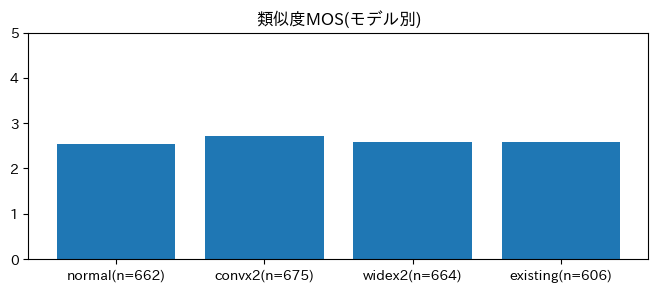

In [13]:
y = ['normal', 'convx2', 'widex2', 'existing']
x = []
for i, n in enumerate(y):
  ids = enq_list[enq_list['output'].str.contains(n)]['id']
  id_max = ids.max()
  id_min = ids.min()
  a = ans_list[id_min<=ans_list['質問番号']][ans_list['質問番号']<=id_max]
  x.append(a['質問２'].mean())
  y[i] += f'(n={len(a["質問２"])})'
fig, ax = plt.subplots(figsize=(8, 3), dpi=100)
plt.ylim(0, 5)
ax.set_title(f'類似度MOS(モデル別)')
ax.bar(y, x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


<BarContainer object of 3 artists>

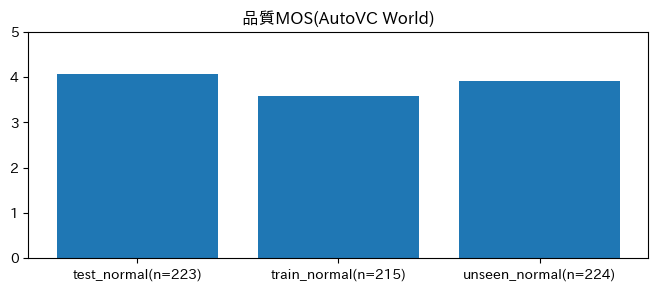

In [14]:
y = ['test_normal', 'train_normal', 'unseen_normal']
x = []
for i, n in enumerate(y):
  ids = enq_list[enq_list['output'].str.contains(n)]['id']
  id_max = ids.max()
  id_min = ids.min()
  a = ans_list[id_min<=ans_list['質問番号']][ans_list['質問番号']<=id_max]
  x.append(a['質問１'].mean())
  y[i] += f'(n={len(a["質問１"])})'
fig, ax = plt.subplots(figsize=(8, 3), dpi=100)
plt.ylim(0, 5)
ax.set_title(f'品質MOS(AutoVC World)')
ax.bar(y, x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


<BarContainer object of 3 artists>

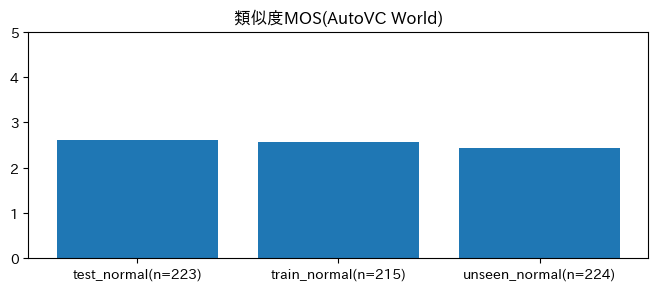

In [15]:
y = ['test_normal', 'train_normal', 'unseen_normal']
x = []
for i, n in enumerate(y):
  ids = enq_list[enq_list['output'].str.contains(n)]['id']
  id_max = ids.max()
  id_min = ids.min()
  a = ans_list[id_min<=ans_list['質問番号']][ans_list['質問番号']<=id_max]
  x.append(a['質問２'].mean())
  y[i] += f'(n={len(a["質問２"])})'
fig, ax = plt.subplots(figsize=(8, 3), dpi=100)
plt.ylim(0, 5)
ax.set_title(f'類似度MOS(AutoVC World)')
ax.bar(y, x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


<BarContainer object of 3 artists>

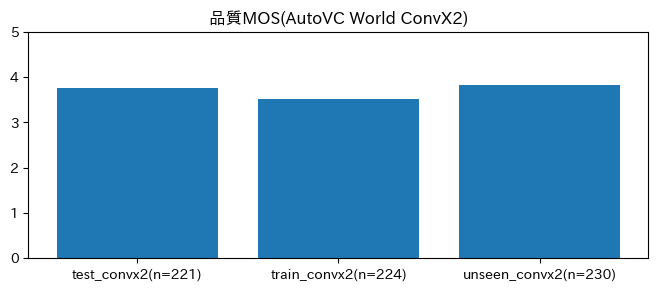

In [16]:
y = ['test_convx2', 'train_convx2', 'unseen_convx2']
x = []
for i, n in enumerate(y):
  ids = enq_list[enq_list['output'].str.contains(n)]['id']
  id_max = ids.max()
  id_min = ids.min()
  a = ans_list[id_min<=ans_list['質問番号']][ans_list['質問番号']<=id_max]
  x.append(a['質問１'].mean())
  y[i] += f'(n={len(a["質問１"])})'
fig, ax = plt.subplots(figsize=(8, 3), dpi=100)
plt.ylim(0, 5)
ax.set_title(f'品質MOS(AutoVC World ConvX2)')
ax.bar(y, x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


<BarContainer object of 3 artists>

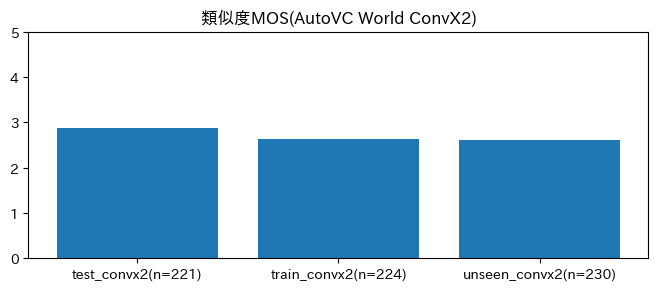

In [17]:
y = ['test_convx2', 'train_convx2', 'unseen_convx2']
x = []
for i, n in enumerate(y):
  ids = enq_list[enq_list['output'].str.contains(n)]['id']
  id_max = ids.max()
  id_min = ids.min()
  a = ans_list[id_min<=ans_list['質問番号']][ans_list['質問番号']<=id_max]
  x.append(a['質問２'].mean())
  y[i] += f'(n={len(a["質問２"])})'
fig, ax = plt.subplots(figsize=(8, 3), dpi=100)
plt.ylim(0, 5)
ax.set_title(f'類似度MOS(AutoVC World ConvX2)')
ax.bar(y, x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


<BarContainer object of 3 artists>

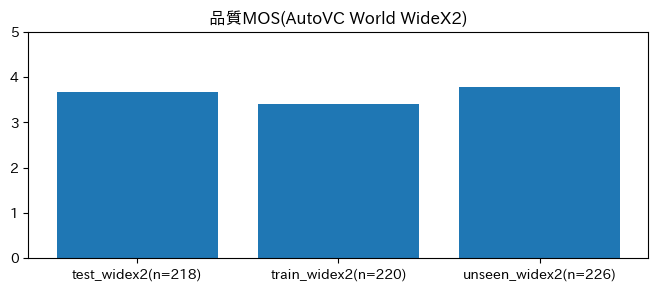

In [18]:
y = ['test_widex2', 'train_widex2', 'unseen_widex2']
x = []
for i, n in enumerate(y):
  ids = enq_list[enq_list['output'].str.contains(n)]['id']
  id_max = ids.max()
  id_min = ids.min()
  a = ans_list[id_min<=ans_list['質問番号']][ans_list['質問番号']<=id_max]
  x.append(a['質問１'].mean())
  y[i] += f'(n={len(a["質問１"])})'
fig, ax = plt.subplots(figsize=(8, 3), dpi=100)
plt.ylim(0, 5)
ax.set_title(f'品質MOS(AutoVC World WideX2)')
ax.bar(y, x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


<BarContainer object of 3 artists>

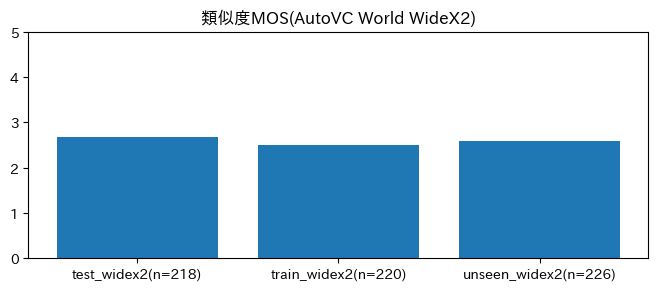

In [19]:
y = ['test_widex2', 'train_widex2', 'unseen_widex2']
x = []
for i, n in enumerate(y):
  ids = enq_list[enq_list['output'].str.contains(n)]['id']
  id_max = ids.max()
  id_min = ids.min()
  a = ans_list[id_min<=ans_list['質問番号']][ans_list['質問番号']<=id_max]
  x.append(a['質問２'].mean())
  y[i] += f'(n={len(a["質問２"])})'
fig, ax = plt.subplots(figsize=(8, 3), dpi=100)
plt.ylim(0, 5)
ax.set_title(f'類似度MOS(AutoVC World WideX2)')
ax.bar(y, x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


<BarContainer object of 3 artists>

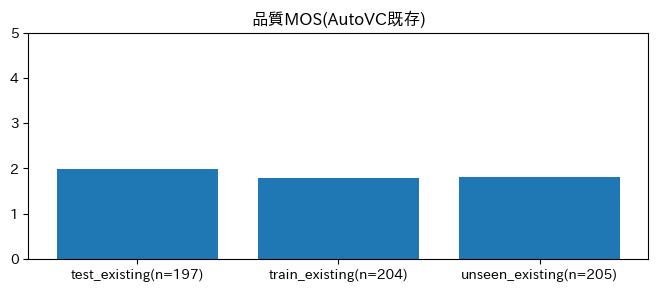

In [20]:
y = ['test_existing', 'train_existing', 'unseen_existing']
x = []
for i, n in enumerate(y):
  ids = enq_list[enq_list['output'].str.contains(n)]['id']
  id_max = ids.max()
  id_min = ids.min()
  a = ans_list[id_min<=ans_list['質問番号']][ans_list['質問番号']<=id_max]
  x.append(a['質問１'].mean())
  y[i] += f'(n={len(a["質問１"])})'
fig, ax = plt.subplots(figsize=(8, 3), dpi=100)
plt.ylim(0, 5)
ax.set_title(f'品質MOS(AutoVC既存)')
ax.bar(y, x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


<BarContainer object of 3 artists>

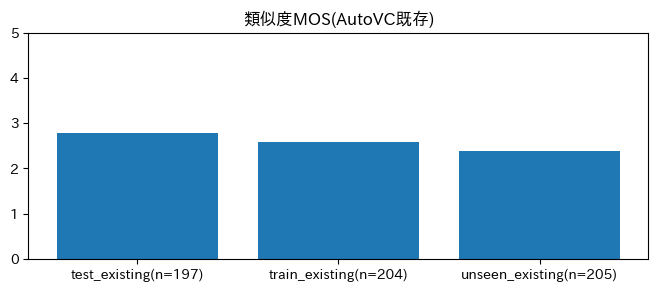

In [21]:
y = ['test_existing', 'train_existing', 'unseen_existing']
x = []
for i, n in enumerate(y):
  ids = enq_list[enq_list['output'].str.contains(n)]['id']
  id_max = ids.max()
  id_min = ids.min()
  a = ans_list[id_min<=ans_list['質問番号']][ans_list['質問番号']<=id_max]
  x.append(a['質問２'].mean())
  y[i] += f'(n={len(a["質問２"])})'
fig, ax = plt.subplots(figsize=(8, 3), dpi=100)
plt.ylim(0, 5)
ax.set_title(f'類似度MOS(AutoVC既存)')
ax.bar(y, x)